# Temperature Forecast Project using ML

# Problem Statement:


# Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Downlaod Files:
    
    
https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Exploratory Data Analysis

In [3]:
#Checking shape of Data.
df.shape

(7752, 25)

In [4]:
#Checking Data Types of all features and as we are getting all features are float except Data column.
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [5]:
#Trying to get information about data and as we are getting the Null values are present in our dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
station             7750 non-null float64
Date                7750 non-null object
Present_Tmax        7682 non-null float64
Present_Tmin        7682 non-null float64
LDAPS_RHmin         7677 non-null float64
LDAPS_RHmax         7677 non-null float64
LDAPS_Tmax_lapse    7677 non-null float64
LDAPS_Tmin_lapse    7677 non-null float64
LDAPS_WS            7677 non-null float64
LDAPS_LH            7677 non-null float64
LDAPS_CC1           7677 non-null float64
LDAPS_CC2           7677 non-null float64
LDAPS_CC3           7677 non-null float64
LDAPS_CC4           7677 non-null float64
LDAPS_PPT1          7677 non-null float64
LDAPS_PPT2          7677 non-null float64
LDAPS_PPT3          7677 non-null float64
LDAPS_PPT4          7677 non-null float64
lat                 7752 non-null float64
lon                 7752 non-null float64
DEM                 7752 non-null float64
Slope       

# Ordinal Encoding

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [7]:
df.drop(['Date'],axis=1,inplace=True)

Droping Data column after use ordinal encoding because we alreadly extract Month and Day data from Data column.



In [8]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Month                2
Day                  2
dtype: int64

Missing values are present in all columns except lat,lon,DEM,Slope and Solar radiation columns.



# Revoming Missing Values

In [9]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="mean")
df['station']=imp.fit_transform(df['station'].values.reshape(-1,1))
df['Present_Tmax']=imp.fit_transform(df['Present_Tmax'].values.reshape(-1,1))
df['Present_Tmin']=imp.fit_transform(df['Present_Tmin'].values.reshape(-1,1))
df['LDAPS_RHmin']=imp.fit_transform(df['LDAPS_RHmin'].values.reshape(-1,1))
df['LDAPS_RHmax']=imp.fit_transform(df['LDAPS_RHmax'].values.reshape(-1,1))
df['LDAPS_Tmax_lapse']=imp.fit_transform(df['LDAPS_Tmax_lapse'].values.reshape(-1,1))
df['LDAPS_Tmin_lapse']=imp.fit_transform(df['LDAPS_Tmin_lapse'].values.reshape(-1,1))
df['LDAPS_WS']=imp.fit_transform(df['LDAPS_WS'].values.reshape(-1,1))
df['LDAPS_LH']=imp.fit_transform(df['LDAPS_LH'].values.reshape(-1,1))
df['LDAPS_CC1']=imp.fit_transform(df['LDAPS_CC1'].values.reshape(-1,1))
df['LDAPS_CC2']=imp.fit_transform(df['LDAPS_CC2'].values.reshape(-1,1))
df['LDAPS_CC3']=imp.fit_transform(df['LDAPS_CC3'].values.reshape(-1,1))
df['LDAPS_CC4']=imp.fit_transform(df['LDAPS_CC4'].values.reshape(-1,1))
df['LDAPS_PPT1']=imp.fit_transform(df['LDAPS_PPT1'].values.reshape(-1,1))
df['LDAPS_PPT2']=imp.fit_transform(df['LDAPS_PPT2'].values.reshape(-1,1))
df['LDAPS_PPT3']=imp.fit_transform(df['LDAPS_PPT3'].values.reshape(-1,1))
df['LDAPS_PPT4']=imp.fit_transform(df['LDAPS_PPT4'].values.reshape(-1,1))
df['Next_Tmax']=imp.fit_transform(df['Next_Tmax'].values.reshape(-1,1))
df['Next_Tmin']=imp.fit_transform(df['Next_Tmin'].values.reshape(-1,1))
df['Month']=imp.fit_transform(df['Month'].values.reshape(-1,1))
df['Day']=imp.fit_transform(df['Day'].values.reshape(-1,1))

In [10]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6.0,30.0


In [11]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Month               0
Day                 0
dtype: int64

Know no missing values are present.

In [12]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Month               float64
Day                 float64
dtype: object

# Statistical Summary

In [13]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,7.080645,16.370968
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276,2.238075,8.240268
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,1.000000,7.000000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,7.000000,16.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,12.000000,31.000000


Statistical Summary provide information about whole data statistically i.e. Count, Mean, Standard Deviation, Minimum value, 25%, 50% 75% and Maximum Value and statistical report is mentioned above.



# Data Visualization

# Correlation

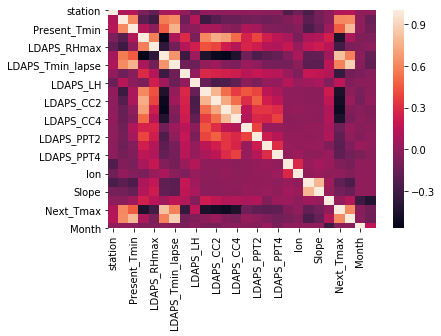

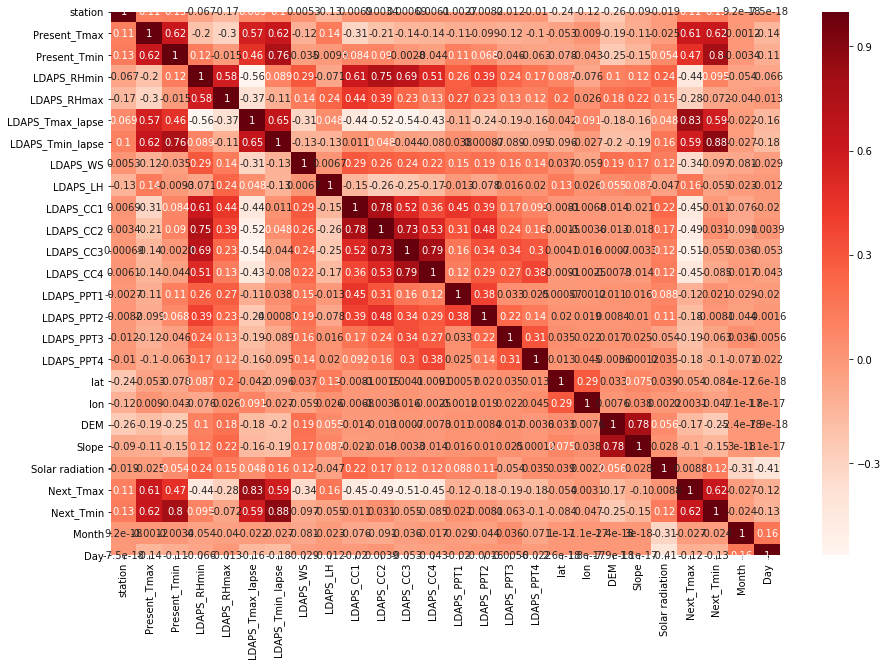

In [14]:
dfcor=df.corr()
dfcor
sns.heatmap(dfcor)
plt.figure(figsize=(15,10))
sns.heatmap(dfcor,cmap='Reds',annot=True)

Present_Tmin is positive correlate with target variable(Present_Tmax). 2. LDAPS_RHmin is highly correlated with LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4. 3. LDAPS_Tmax_lapse is highly positive correlate with target variable. 4. Good correlation present between LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4. 5. As we are getting from above few value also preset that is negative correlated.

# Univariate Analysis

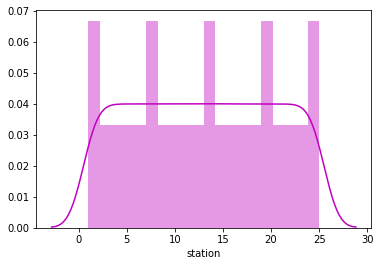

In [15]:
sns.distplot(df.station, color = "m")
plt.show()

In Station columns the data is not normally distributed.



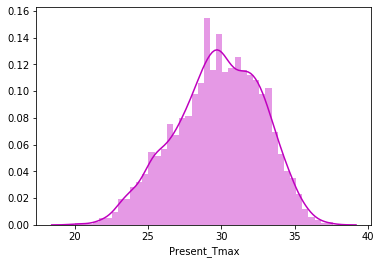

In [16]:
sns.distplot(df.Present_Tmax, color = "m")
plt.show()

Data is normally distibuted in target vaiable.

Text(0.5, 1.0, 'Present_Tmax Vs Next_Tmax')

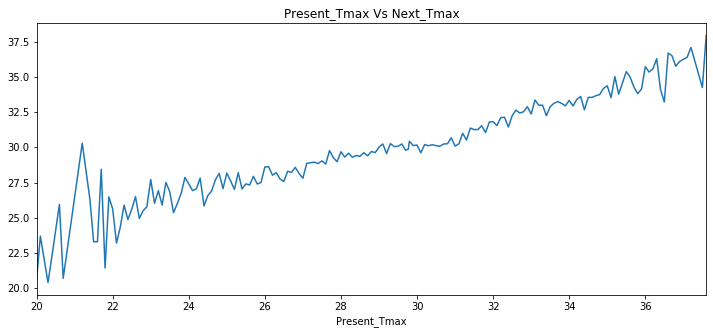

In [17]:
dategroup = df.groupby('Present_Tmax').mean()
plt.figure(figsize=(12,5))
dategroup['Next_Tmax'].plot(x=df.Present_Tmax)
plt.title('Present_Tmax Vs Next_Tmax')

Here we are trying to comapre Present_Tmax with Next_Tmax temperature and between 20.0 to 22.5 the temperature have more difference and after that it is increasing continuously.



Text(0.5, 1.0, 'Next_Tmin Vs Present_Tmin')

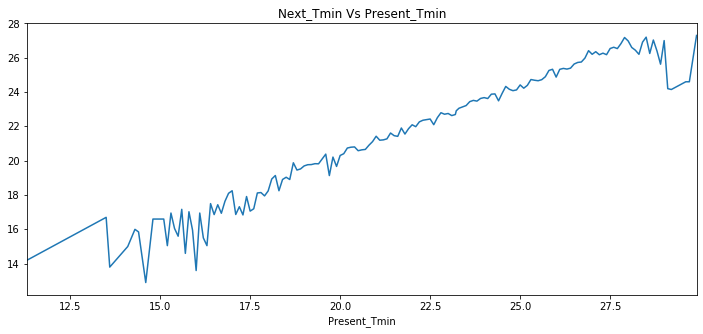

In [18]:
dategroup = df.groupby('Present_Tmin').mean()
plt.figure(figsize=(12,5))
dategroup['Next_Tmin'].plot(x=df.Present_Tmin)
plt.title('Next_Tmin Vs Present_Tmin')

Here we are trying to comapre Present_Tmin with Next_Tmin temperature and between 12.5 to 17.5 the temperature have more variance and after that it is increasing continuously.



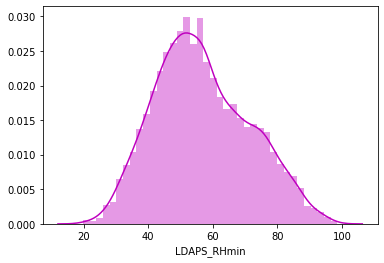

In [19]:
sns.distplot(df.LDAPS_RHmin, color = "m")
plt.show()

the data is normally distributed in LDAPS_RHmin column.



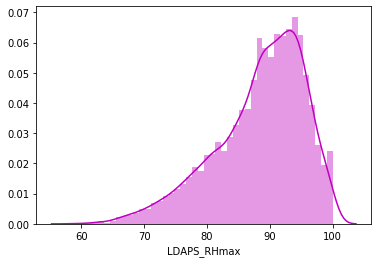

In [20]:
sns.distplot(df.LDAPS_RHmax, color = "m")
plt.show()

In LDAPS_RHmax the left few trail skewness is present and data is asymetrical data.



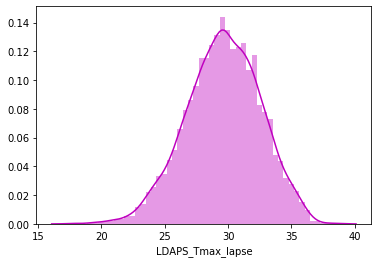

In [21]:
sns.distplot(df.LDAPS_Tmax_lapse, color = "m")
plt.show()

In above column the data is normally distributed and Symetrical data.



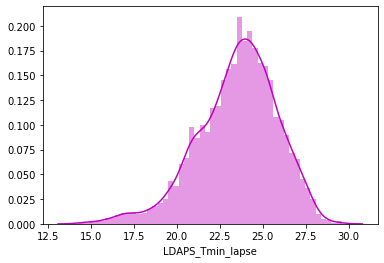

In [22]:
sns.distplot(df.LDAPS_Tmin_lapse, color = "m")
plt.show()

The data is normally distributed in above column.



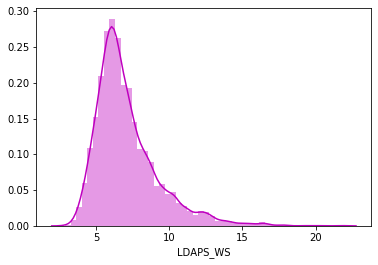

In [23]:
sns.distplot(df.LDAPS_WS, color = "m")
plt.show()

In LDAPS_WS column right tail skewness is present.



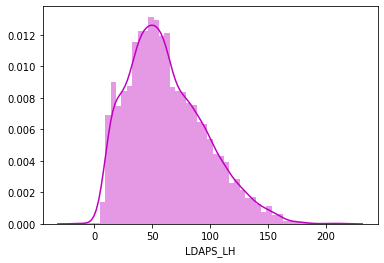

In [24]:
sns.distplot(df.LDAPS_LH, color = "m")
plt.show()

Here the data is normally distributed almost but very few right trail skewness is present.



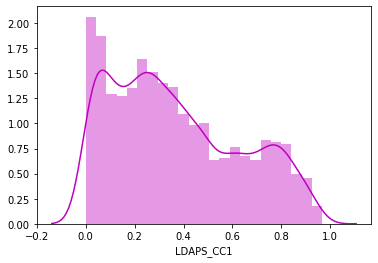

In [25]:
sns.distplot(df.LDAPS_CC1, color = "m")
plt.show()

the data is not normally distributed.



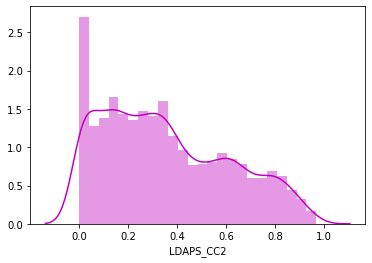

In [26]:
sns.distplot(df.LDAPS_CC2, color = "m")
plt.show()

In above columns right trail skewness is present and data is asymetrical.



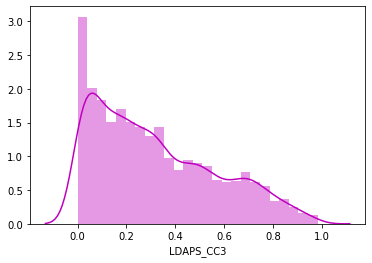

In [27]:
sns.distplot(df.LDAPS_CC3, color = "m")
plt.show()

In above columns right trail skewness is present and data is asymetrical.



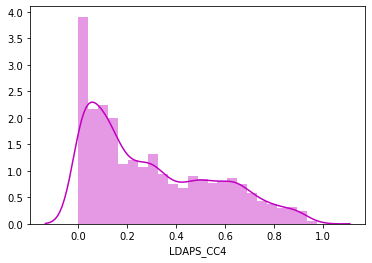

In [28]:
sns.distplot(df.LDAPS_CC4, color = "m")
plt.show()

In above columns right trail skewness is present and data is asymetrical.



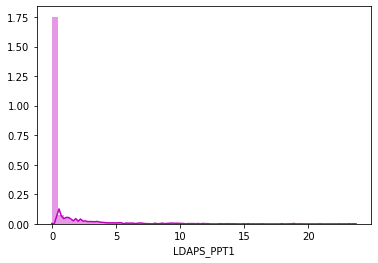

In [29]:
sns.distplot(df.LDAPS_PPT1, color = "m")
plt.show()

In LADPS_PPT1 the data is not normally distributed and right trail skewness is present is data so this is asymetrical data.



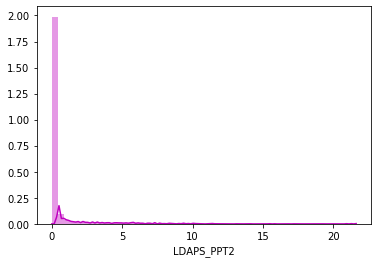

In [30]:
sns.distplot(df.LDAPS_PPT2, color = "m")
plt.show()

In LADPS_PPT2 the data is not normally distributed and right trail skewness is present is data so this is asymetrical data.



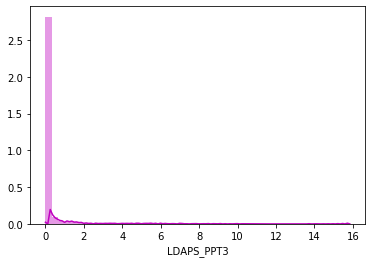

In [31]:
sns.distplot(df.LDAPS_PPT3, color = "m")
plt.show()

In LADPS_PPT3 the data is not normally distributed and right trail skewness is present is data so this is asymetrical data.



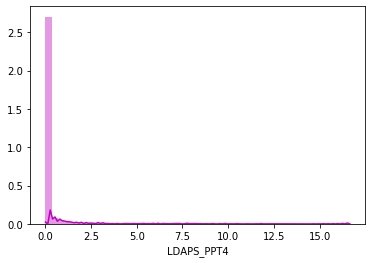

In [32]:
sns.distplot(df.LDAPS_PPT4, color = "m")
plt.show()

In LADPS_PPT4 the data is not normally distributed and right trail skewness is present is data so this is asymetrical data.



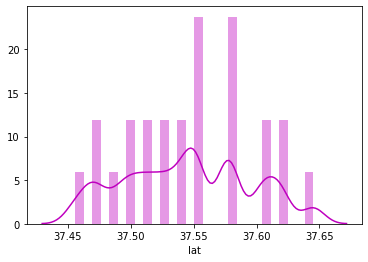

In [33]:
sns.distplot(df.lat, color = "m")
plt.show()

The data is not normally distributed in lat column there are many peak present in above diagram.



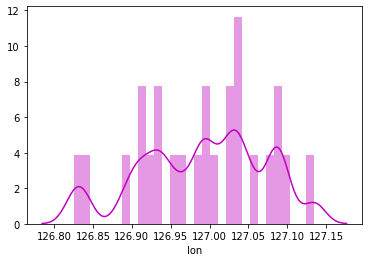

In [34]:
sns.distplot(df.lon, color = "m")
plt.show()

The data is not normally distributed in lon column there are many peak present in above diagram.



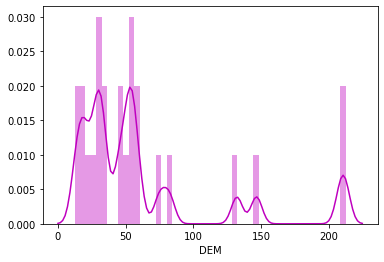

In [35]:
sns.distplot(df.DEM, color = "m")
plt.show()

The data is not normally distributed in DEN column there are many peak present in above diagram.



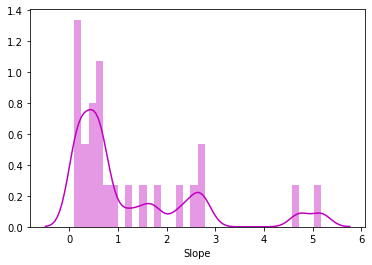

In [36]:
sns.distplot(df.Slope, color = "m")
plt.show()

The data is not normally distributed in Slope column there are many peak present in above diagram.



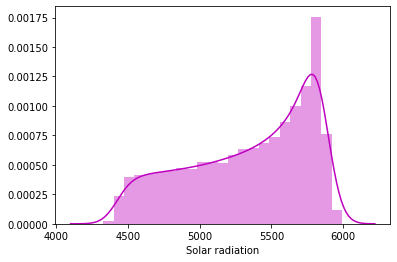

In [37]:
sns.distplot(df['Solar radiation'], color = "m")
plt.show()

In above columns left trail skewness is present and data is asymetrical.



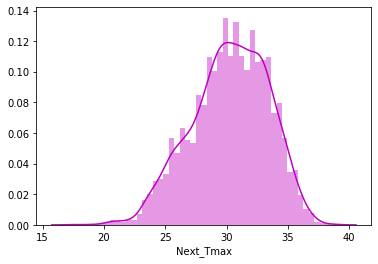

In [38]:
sns.distplot(df['Next_Tmax'], color = "m")
plt.show()

The data is normally distributed in target vaiable.



# Bivariate Analysis

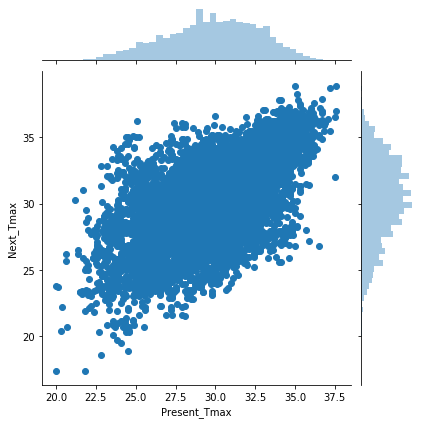

In [39]:
sns.jointplot(x='Present_Tmax',y='Next_Tmax',data=df)

Next_Tmax and Present_Tmax shows an association that is positive and linear.



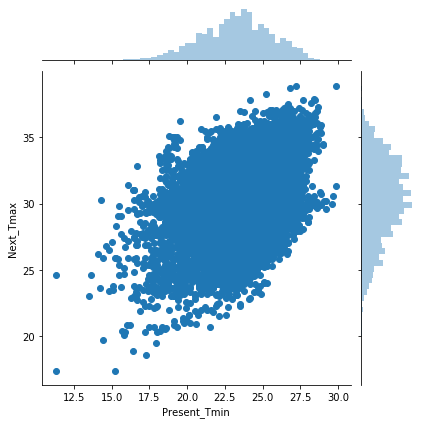

In [40]:
sns.jointplot(x='Present_Tmin',y='Next_Tmax',data=df)

Next_Tmax and Present_Tmin shows an association that is positive and linear, but the association looks weaker.


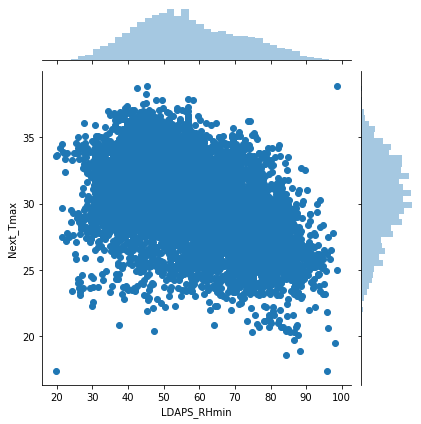

In [41]:
sns.jointplot(x='LDAPS_RHmin',y='Next_Tmax',data=df)

Next_Tmax and LDAPS_RHmin shows an association that is Negative and linear and appears to be somewhat strong with a few outliers.



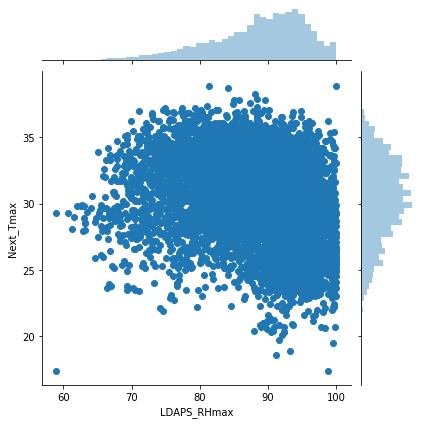

In [42]:
sns.jointplot(x='LDAPS_RHmax',y='Next_Tmax',data=df)

Next_Tmax and LDAPS_RHmax shows an association that is Negative and Non linear.



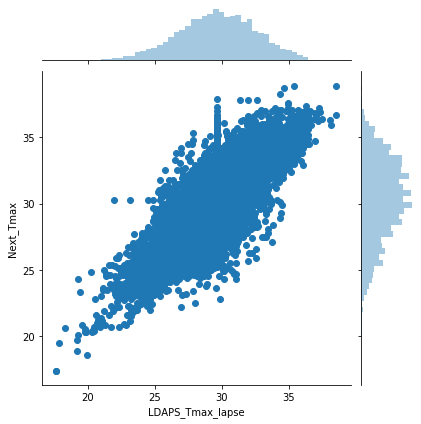

In [43]:
sns.jointplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df)

Next_Tmax and LDAPS_Tmax_Lapse shows an association that is positive and linear, but the association looks strong.



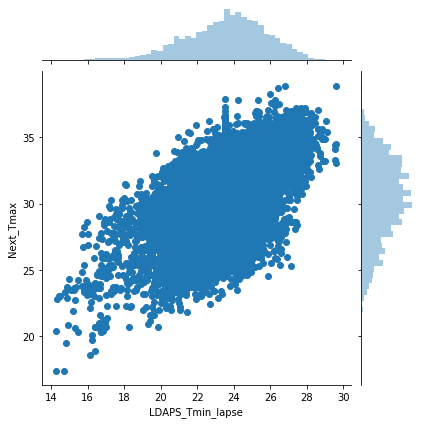

In [44]:
sns.jointplot(x='LDAPS_Tmin_lapse',y='Next_Tmax',data=df)

Next_Tmax and LDAPS_Tmin_Lapse shows an association that is positive and linear, but the association looks strong.



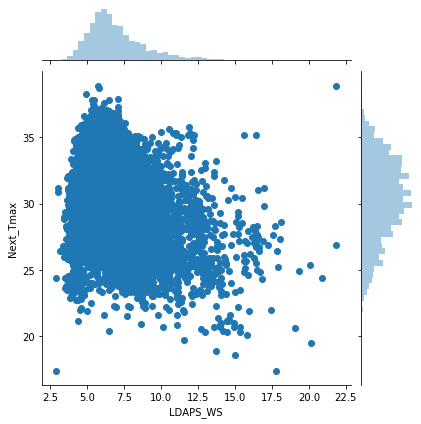

In [45]:
sns.jointplot(x='LDAPS_WS',y='Next_Tmax',data=df)

Next_Tmax and LDAPS_WS shows an association that is Negative and linear.


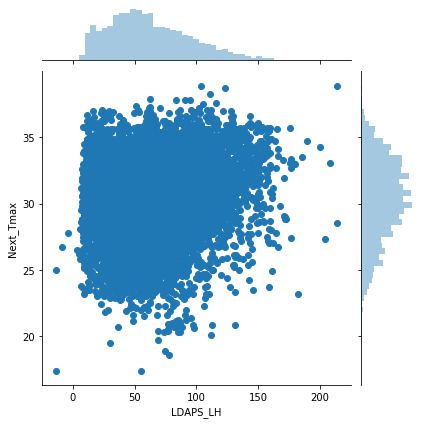

In [46]:
sns.jointplot(x='LDAPS_LH',y='Next_Tmax',data=df)

Next_Tmax and LDAPS_LH shows an association that is positive and linear but the association looks very weaker.



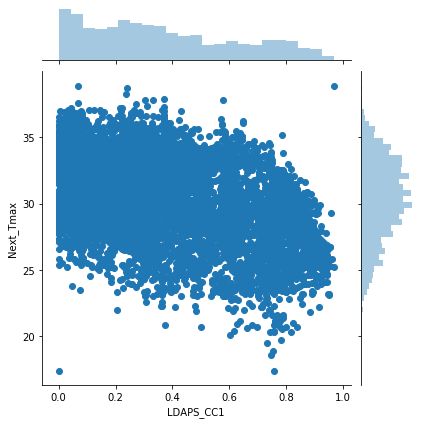

In [47]:
sns.jointplot(x='LDAPS_CC1',y='Next_Tmax',data=df)

Next_Tmax and LDAPS_CC1 shows an association that is Negative and linear.



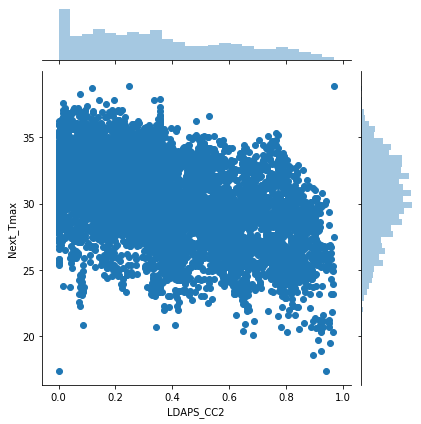

In [48]:
sns.jointplot(x='LDAPS_CC2',y='Next_Tmax',data=df)

Next_Tmax and LDAPS_CC2 shows an association that is Negative and linear.



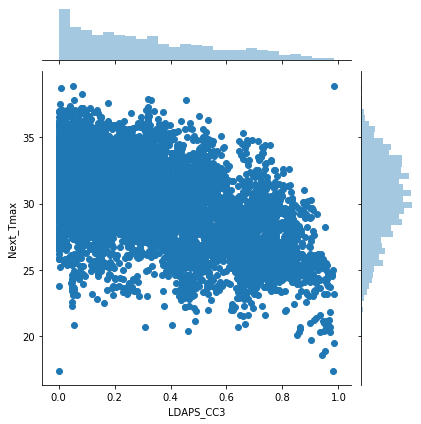

In [49]:
sns.jointplot(x='LDAPS_CC3',y='Next_Tmax',data=df)

Next_Tmax and LDAPS_CC3 shows an association that is Negative and linear.



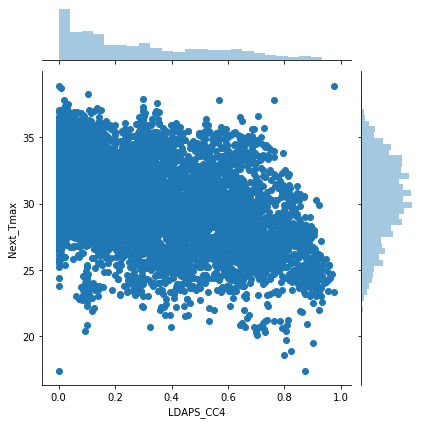

In [50]:
sns.jointplot(x='LDAPS_CC4',y='Next_Tmax',data=df)

Next_Tmax and LDAPS_CC4 shows very weak negative relationship.



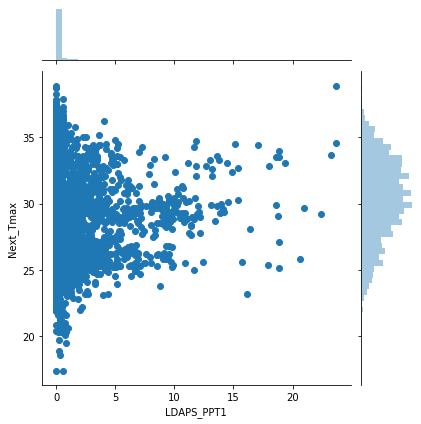

In [51]:
sns.jointplot(x='LDAPS_PPT1',y='Next_Tmax',data=df)

Next_Tmax and LDAPS_PPT1 shows an association that is Non linear relationship



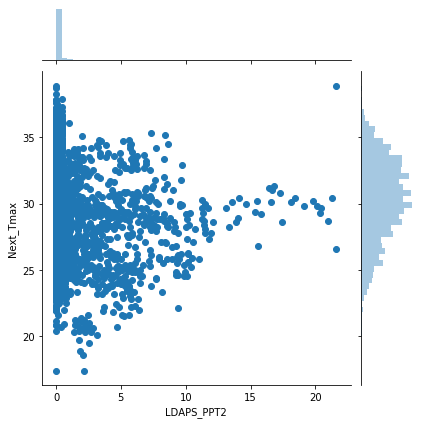

In [52]:
sns.jointplot(x='LDAPS_PPT2',y='Next_Tmax',data=df)

Next_Tmax and LDAPS_PPT2 shows an association that is Non linear relationship



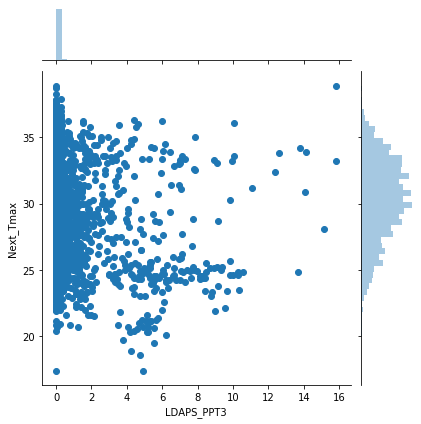

In [53]:
sns.jointplot(x='LDAPS_PPT3',y='Next_Tmax',data=df)

Next_Tmax and LDAPS_PPT3 shows an association that is Non linear relationship



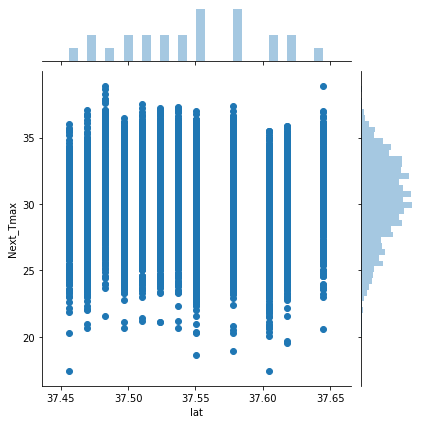

In [54]:
sns.jointplot(x='lat',y='Next_Tmax',data=df)

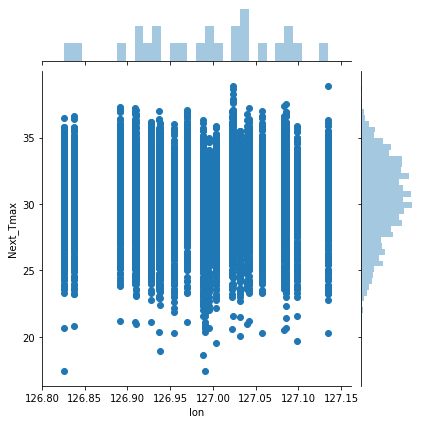

In [55]:
sns.jointplot(x='lon',y='Next_Tmax',data=df)

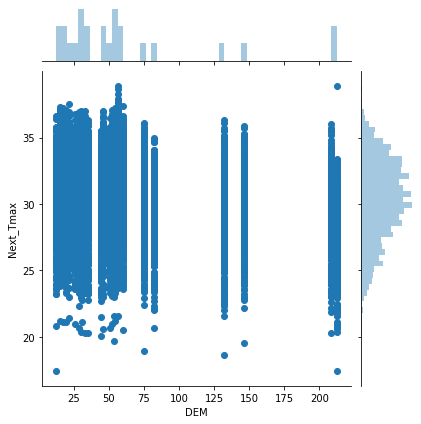

In [56]:
sns.jointplot(x='DEM',y='Next_Tmax',data=df)

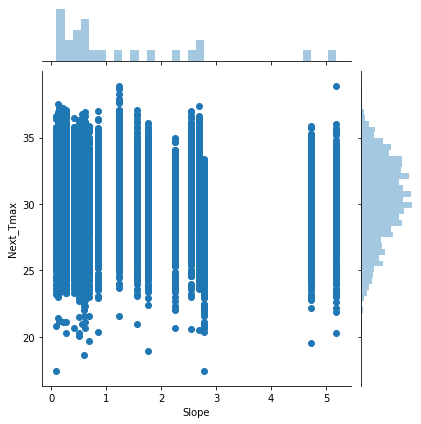

In [57]:
sns.jointplot(x='Slope',y='Next_Tmax',data=df)

lat, lon, DEM and Slope are categorical columns and if we check relationship with target variable then it is showing Non liner relationship.



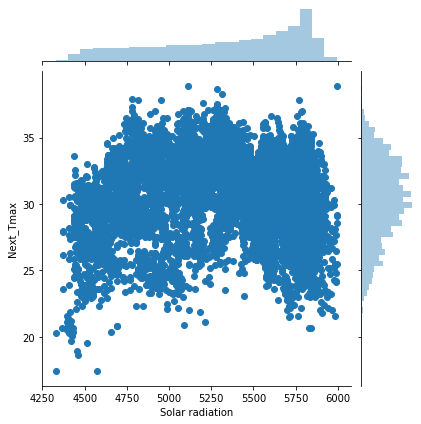

In [58]:
sns.jointplot(x='Solar radiation',y='Next_Tmax',data=df)

No Relationship between Solar radiation and target variable.


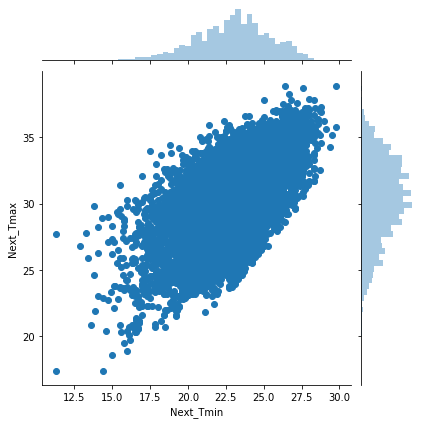

In [59]:
sns.jointplot(x='Next_Tmin',y='Next_Tmax',data=df)

Next_Tmax and Next_Tmin shows an association that is positive and linear and the association looks strong.



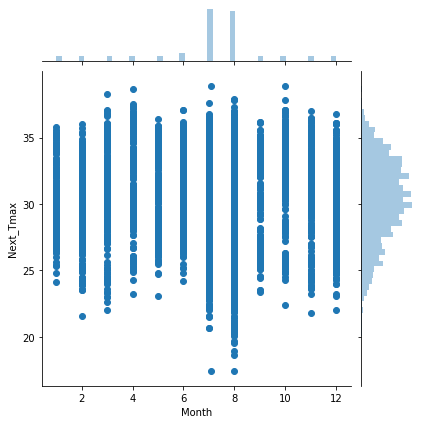

In [60]:
sns.jointplot(x='Month',y='Next_Tmax',data=df)

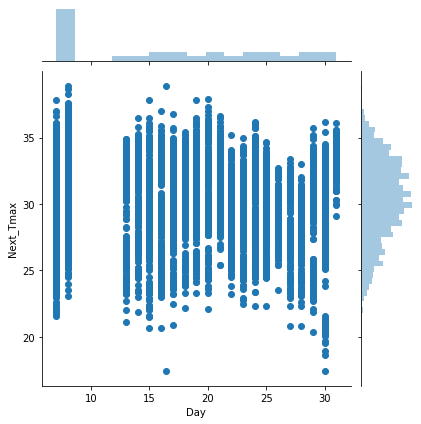

In [61]:
sns.jointplot(x='Day',y='Next_Tmax',data=df)

Above two columns are categorical so here no liner relationship.

# Multivariate Analysis

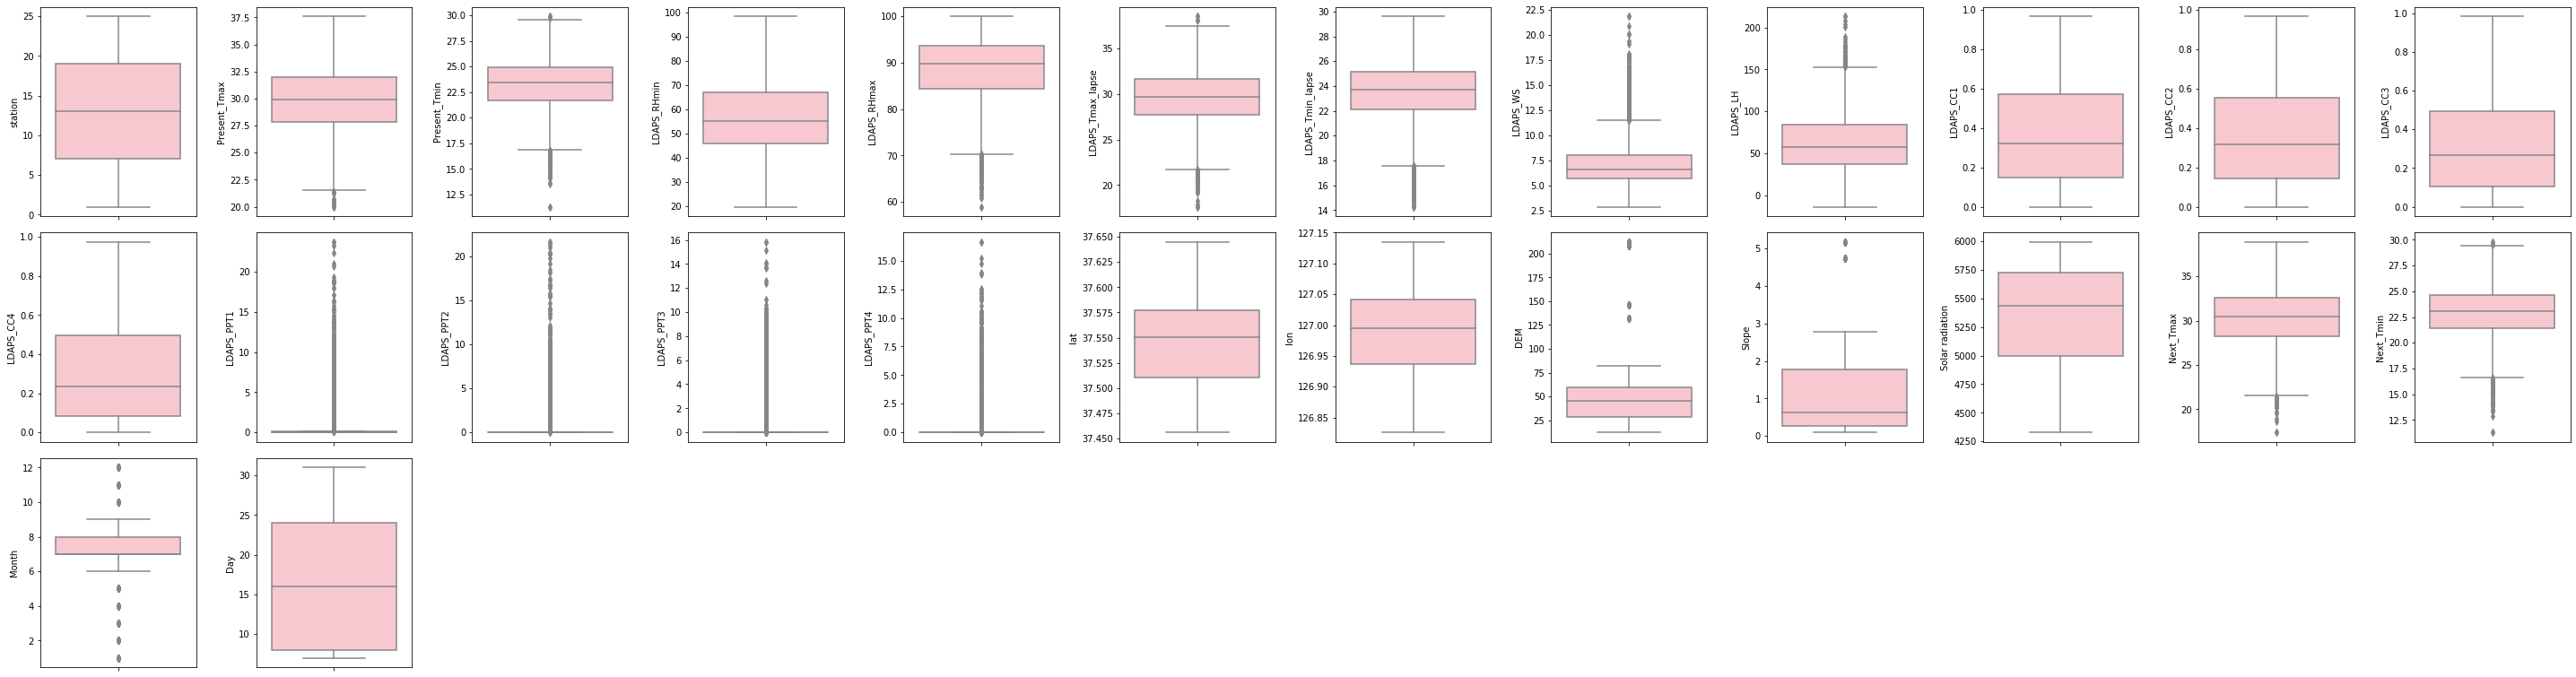

In [62]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(40,35))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='Pink', orient='v')
    plt.tight_layout()

As we are getting, in many features the outliers are present so We have to remove all outliers for better model building and for good prediction.



In [63]:
#sns.pairplot(df)

# Removing Outliers.

In [64]:
from scipy.stats import zscore

In [65]:
z=np.abs(zscore(df))
z

array([[1.66431530e+00, 3.61325771e-01, 7.59529314e-01, ...,
        6.97599301e-01, 4.82876998e-01, 1.65406177e+00],
       [1.52562236e+00, 7.21084007e-01, 6.76295896e-01, ...,
        1.74063574e-01, 4.82876998e-01, 1.65406177e+00],
       [1.38692941e+00, 6.19608090e-01, 3.11881532e-02, ...,
        3.89744132e-01, 4.82876998e-01, 1.65406177e+00],
       ...,
       [1.66431530e+00, 2.22171758e+00, 2.42419767e+00, ...,
        2.22793450e+00, 4.10805804e-01, 1.65406177e+00],
       [0.00000000e+00, 3.30412736e+00, 4.96281690e+00, ...,
        4.68452522e+00, 3.96874890e-16, 0.00000000e+00],
       [0.00000000e+00, 2.64912642e+00, 2.77789093e+00, ...,
        2.76579089e+00, 3.96874890e-16, 0.00000000e+00]])

Applying Zscore value to entire data for removing outliters form data.



In [66]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))


Setting threshold value



In [67]:
z[25][7]

3.9161348848797526

In [68]:
z[7751][16]

13.651789982199812

after setting threshold value here, we are checking values that is more then threshold value.



In [69]:
df_new=df[(z<3).all(axis=1)]
df_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,8.0,30.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,8.0,30.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,8.0,30.0


The above functionality provide us all value that is below threshold point.



In [70]:
df.shape

(7752, 26)

In [71]:
df_new.shape

(6894, 26)

In [72]:
7752-6894

858

In [73]:
(858/7752)*100

11.06811145510836

As we know the data is most important for us and if we are applying above functionality then we are loosing approx. 11% of data tha is very huge. Know we are trying to remove outliers with IQR functionality.



In [74]:
q1=df.quantile(0.25)
q1

station                7.000000
Present_Tmax          27.800000
Present_Tmin          21.700000
LDAPS_RHmin           46.046162
LDAPS_RHmax           84.316923
LDAPS_Tmax_lapse      27.693091
LDAPS_Tmin_lapse      22.114651
LDAPS_WS               5.686487
LDAPS_LH              37.532764
LDAPS_CC1              0.148321
LDAPS_CC2              0.142328
LDAPS_CC3              0.103100
LDAPS_CC4              0.082741
LDAPS_PPT1             0.000000
LDAPS_PPT2             0.000000
LDAPS_PPT3             0.000000
LDAPS_PPT4             0.000000
lat                   37.510200
lon                  126.937000
DEM                   28.700000
Slope                  0.271300
Solar radiation     4999.018555
Next_Tmax             28.200000
Next_Tmin             21.400000
Month                  7.000000
Day                    8.000000
Name: 0.25, dtype: float64

In Q1 all data upto 25% quantile.



In [75]:
q3=df.quantile(0.75)
q3

station               19.000000
Present_Tmax          32.000000
Present_Tmin          24.900000
LDAPS_RHmin           67.038254
LDAPS_RHmax           93.704500
LDAPS_Tmax_lapse      31.683819
LDAPS_Tmin_lapse      25.134000
LDAPS_WS               8.007471
LDAPS_LH              83.904586
LDAPS_CC1              0.571696
LDAPS_CC2              0.554963
LDAPS_CC3              0.494007
LDAPS_CC4              0.497230
LDAPS_PPT1             0.067593
LDAPS_PPT2             0.024276
LDAPS_PPT3             0.009697
LDAPS_PPT4             0.000693
lat                   37.577600
lon                  127.042000
DEM                   59.832400
Slope                  1.767800
Solar radiation     5728.316406
Next_Tmax             32.600000
Next_Tmin             24.600000
Month                  8.000000
Day                   24.000000
Name: 0.75, dtype: float64

In Q3 all data upto 75% quantile.



In [76]:
IQR=q3-q1
IQR

station              12.000000
Present_Tmax          4.200000
Present_Tmin          3.200000
LDAPS_RHmin          20.992092
LDAPS_RHmax           9.387577
LDAPS_Tmax_lapse      3.990727
LDAPS_Tmin_lapse      3.019349
LDAPS_WS              2.320984
LDAPS_LH             46.371822
LDAPS_CC1             0.423375
LDAPS_CC2             0.412635
LDAPS_CC3             0.390907
LDAPS_CC4             0.414489
LDAPS_PPT1            0.067593
LDAPS_PPT2            0.024276
LDAPS_PPT3            0.009697
LDAPS_PPT4            0.000693
lat                   0.067400
lon                   0.105000
DEM                  31.132400
Slope                 1.496500
Solar radiation     729.297851
Next_Tmax             4.400000
Next_Tmin             3.200000
Month                 1.000000
Day                  16.000000
dtype: float64

Q3-Q1



In [77]:
print((df<(q1-(1.5*IQR)))|(df>(q3+(1.5*IQR))))

      station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0       False         False         False        False        False   
1       False         False         False        False        False   
2       False         False         False        False        False   
3       False         False         False        False        False   
4       False         False         False        False        False   
...       ...           ...           ...          ...          ...   
7747    False         False         False        False        False   
7748    False         False         False        False        False   
7749    False         False         False        False        False   
7750    False          True          True        False         True   
7751    False         False          True        False        False   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0                False             False     False     False      F

with the help of IQR we are dividing all data between 25% to 75% Percentile.



In [78]:
x_new=df[(z<3).all(axis=1)]
x_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,8.0,30.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,8.0,30.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,8.0,30.0


The above functionality provide us all value that is below threshold point.



In [79]:
(858/7752)*100

11.06811145510836

Here also we are loosing 11% of data so know we are building model without removing outliers.



# Removing Skewness

In [80]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Month              -0.705332
Day                 0.245514
dtype: float64

In [81]:
df['LDAPS_WS']=np.log(df['LDAPS_WS'])

In [82]:
sqrt_mileage = np.sqrt(df['LDAPS_PPT1'])

In [83]:
recipr_LDAPS_PPT1 = np.reciprocal(df['LDAPS_PPT1'])

In [84]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            0.577689
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Month              -0.705332
Day                 0.245514
dtype: float64

In [85]:
from scipy.stats import boxcox
df['Slope']=boxcox(df['Slope'],0)

In [86]:
from scipy.stats import boxcox
df['DEM']=boxcox(df['DEM'],0)

In [87]:
df['LDAPS_PPT1']=np.log1p(df['LDAPS_PPT1'])

In [88]:
df['LDAPS_PPT1']=np.log1p(df['LDAPS_PPT1'])

In [89]:
df['LDAPS_PPT2']=np.log1p(df['LDAPS_PPT2'])

In [90]:
df['LDAPS_PPT3']=np.log1p(df['LDAPS_PPT3'])

In [91]:
df['LDAPS_PPT4']=np.log1p(df['LDAPS_PPT4'])

In [92]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            0.577689
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          2.188048
LDAPS_PPT2          3.171648
LDAPS_PPT3          3.995810
LDAPS_PPT4          4.211296
lat                 0.087062
lon                -0.285213
DEM                 0.409854
Slope               0.062637
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Month              -0.705332
Day                 0.245514
dtype: float64

In [93]:
df['LDAPS_PPT1']=np.sqrt(df['LDAPS_PPT1'])

In [94]:
df['LDAPS_PPT2']=np.sqrt(df['LDAPS_PPT2'])

In [95]:
df['LDAPS_PPT3']=np.sqrt(df['LDAPS_PPT3'])

In [96]:
df['LDAPS_PPT4']=np.sqrt(df['LDAPS_PPT4'])

In [97]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            0.577689
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          1.548791
LDAPS_PPT2          2.121891
LDAPS_PPT3          2.531433
LDAPS_PPT4          2.746530
lat                 0.087062
lon                -0.285213
DEM                 0.409854
Slope               0.062637
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Month              -0.705332
Day                 0.245514
dtype: float64

In [98]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.919696,69.451805,0.233947,...,0.0,37.6046,126.991,5.358165,1.024248,5992.895996,29.1,21.2,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.739042,51.937448,0.225508,...,0.0,37.6046,127.032,3.801369,-0.665337,5869.312500,30.5,22.5,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.814535,20.573050,0.209344,...,0.0,37.5776,127.058,3.505762,-1.323883,5863.555664,31.1,23.9,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.731664,65.727144,0.216372,...,0.0,37.6450,127.022,3.822448,0.930115,5856.964844,31.7,24.3,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.746589,107.965535,0.151407,...,0.0,37.5507,127.135,3.556433,-0.682207,5859.552246,31.2,22.5,6.0,30.0


# Spliting data into target vairable and Independent variable.

In [99]:
x=df.drop('Next_Tmax',axis=1)
y=df['Next_Tmax']

# Data Scaling

In [100]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X=sc.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Month,Day
0,0.000000,0.494318,0.543011,0.488518,0.783659,0.499546,0.569132,0.425009,0.365853,0.241862,...,0.0,0.0,0.786017,0.533981,1.000000,0.843476,1.000000,0.535135,0.454545,0.958333
1,0.041667,0.676136,0.553763,0.412406,0.771200,0.584480,0.636121,0.335835,0.288703,0.233137,...,0.0,0.0,0.786017,0.666667,0.452390,0.417073,0.925703,0.605405,0.454545,0.958333
2,0.083333,0.659091,0.645161,0.367024,0.609716,0.595982,0.670697,0.373100,0.150545,0.216426,...,0.0,0.0,0.643008,0.750809,0.348408,0.250875,0.922242,0.681081,0.454545,0.958333
3,0.125000,0.681818,0.650538,0.488316,0.914366,0.577497,0.589934,0.332193,0.349446,0.223692,...,0.0,0.0,1.000000,0.634304,0.459805,0.819719,0.918280,0.702703,0.454545,0.958333
4,0.166667,0.647727,0.569892,0.462078,0.760251,0.549257,0.600379,0.339560,0.535505,0.156529,...,0.0,0.0,0.500530,1.000000,0.366232,0.412816,0.919835,0.605405,0.454545,0.958333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,0.916667,0.187500,0.311828,0.088234,0.485429,0.417221,0.293420,0.373959,0.377335,0.031050,...,0.0,0.0,0.429025,0.210356,0.081326,0.115133,0.068411,0.367568,0.636364,0.958333
7748,0.958333,0.187500,0.344086,0.053931,0.447077,0.448683,0.290673,0.404609,0.268018,0.037087,...,0.0,0.0,0.357521,0.268608,0.117900,0.205488,0.065441,0.405405,0.636364,0.958333
7749,1.000000,0.181818,0.327957,0.039862,0.445829,0.493112,0.276953,0.457936,0.099963,0.050610,...,0.0,0.0,0.357521,0.466019,0.161617,0.255760,0.073239,0.329730,0.636364,0.958333
7750,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.552786,0.390457


In [101]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

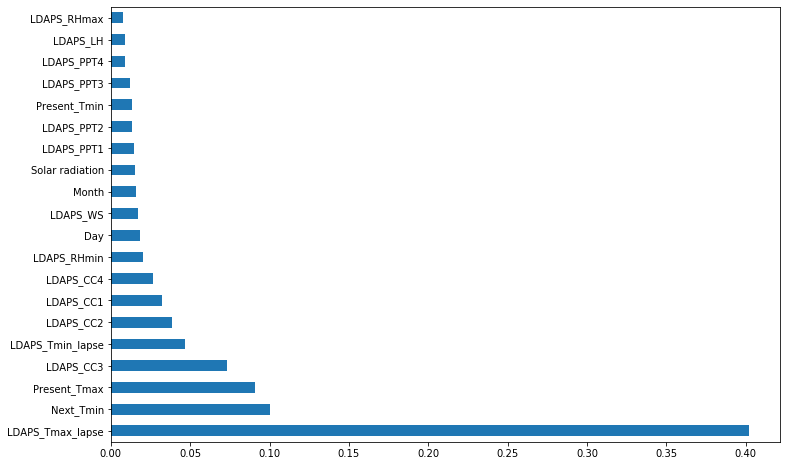

In [102]:
plt.figure(figsize = (12,8))
feat_importances=pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Finding best Random State for train test split.

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20, random_state = i)
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predf = LR.predict(X_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.8224454435017904  on Random State  880


In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=880)

In [105]:
#Checking shape of train data and test data.
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(6201, 25) (6201,) (1551, 25) (1551,)


# LinearRegression

In [106]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [107]:
lr.coef_

array([ 0.4772862 ,  2.34155702, -1.20387236,  1.2877306 , -0.37279679,
       11.91720726, -3.2198425 , -2.71100492,  1.53573335, -1.04532503,
       -0.89080055, -0.77789082, -1.32506457,  0.1362942 ,  1.04415752,
       -0.26185919,  0.93586638, -0.04994754, -0.43204224,  0.4738495 ,
       -0.0360372 ,  0.03315708,  8.94199661, -0.3272169 , -0.02698887])

In [108]:
lr.score(X_train,y_train)

0.7832353880419637

In [109]:
pred=lr.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [36.09332955 31.07254823 32.92385367 ... 31.14707098 28.94996222
 35.13286701]
error:
Mean absolute error: 1.0606234922718887
Mean squared error: 1.9024754175091905
Root Mean Squared error: 1.37930251123863
0.8224454435017904


# DecisionTreeRegressor

In [110]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
pred=dtc.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [33.5 29.6 31.9 ... 31.2 30.1 34. ]
error:
Mean absolute error: 0.9487586461600096
Mean squared error: 1.7183703845994562
Root Mean Squared error: 1.3108662725844527
0.8396276300186463


# RandomForestRegressor

In [111]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
predrf=rf.predict(X_test)
print('Predicted Result Price:',predrf)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,predrf)))
print(r2_score(y_test,predrf))

Predicted Result Price: [35.138      31.052      32.80374887 ... 31.026      29.963
 34.579     ]
error:
Mean absolute error: 0.6811573074266729
Mean squared error: 0.8418248818118652
Root Mean Squared error: 0.9175101535197664
0.9214340210845109


# AdaBoostRegressor

In [112]:
from sklearn.ensemble import AdaBoostRegressor
ad=RandomForestRegressor(n_estimators=100)
ad.fit(X_train,y_train)
ad.score(X_train,y_train)
pred=ad.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [35.496      30.921      32.916      ... 30.952      29.90474887
 34.267     ]
error:
Mean absolute error: 0.6798220252514815
Mean squared error: 0.8358172700203957
Root Mean Squared error: 0.9142304250135169
0.9219947005221691


# KNeighborsRegressor

In [113]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
pred=knn.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [34.54 31.02 31.74 ... 31.86 31.2  33.62]
error:
Mean absolute error: 0.9909991215605759
Mean squared error: 1.7359076668872946
Root Mean Squared error: 1.317538487820107
0.837990907488545


As we seen the RandomForest Regressor scoring 92% but there are some case of overfitting or underfitting so We are Cross validating the models to see the are underfitting or overfitting present or not.



# Cross Validation

In [114]:
from sklearn.model_selection import cross_val_score
LR=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of Linear Regression Model:", LR.mean())

Cross Validation Score of Linear Regression Model: 0.7259010683525519


In [115]:
DTC=cross_val_score(dtc,X,y,cv=5)
print("Cross Validation Score of DecisionTreeRegressor Model:", DTC.mean())

Cross Validation Score of DecisionTreeRegressor Model: 0.47332634331382756


In [116]:
RFR=cross_val_score(rf,X,y,cv=5)
print("Cross Validation Score of Random Forest Regressor Model:", RFR.mean())

Cross Validation Score of Random Forest Regressor Model: 0.7021599551555755


In [117]:
AD=cross_val_score(ad,X,y,cv=5)
print("Cross Validation Score of AdaBoostRegressor Model:", AD.mean())

Cross Validation Score of AdaBoostRegressor Model: 0.7017142087627034


In [118]:
KNN=cross_val_score(knn,X,y,cv=5)
print("Cross Validation Score of KNeighborsRegressor Model:", KNN.mean())

Cross Validation Score of KNeighborsRegressor Model: 0.5208247331493633


After applying cross validation we get to know big difference present between Algorithm and Cross validation So know we are applying Hyper Parameter Tuning.



# Hyper Parameter Tuning

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 42)
parameters = {'bootstrap': [True],'criterion': ['mse','mae'],'max_depth':[None],'n_estimators':[100], 'random_state':[42]}

grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f" % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.8996407054812954
Residual sum of squares: 0.84


In [120]:
#creating parameter list to pass in GridSearchCV
parameters= {'fit_intercept': ['True','False'],
             'normalize': ['True','False'],
             'copy_X': ['True','False'],
             'n_jobs': np.arange(-5,5)}

In [121]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [122]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4]),
                         'normalize': ['True', 'False']})

In [123]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': -5, 'normalize': 'True'}

In [124]:
GCV_pred=GCV.best_estimator_.predict(X_test)

In [125]:
r2_score(GCV_pred,y_test)

0.7667484760469355

# Prediction

In [126]:
import numpy as np
a = np.array(y_test)
predicted = np.array(predrf)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,35.3,35.138000
1,30.4,31.052000
2,32.6,32.803749
3,30.3,30.124498
4,29.6,29.304498
...,...,...
1546,30.1,30.899498
1547,36.6,35.893749
1548,31.2,31.026000
1549,29.8,29.963000


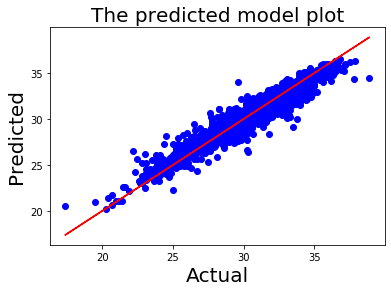

In [127]:
plt.scatter(x=y_test, y=predrf, color = "blue")
plt.plot(y_test,y_test, color='r')
plt.xlabel("Actual", fontsize =20)
plt.ylabel("Predicted", fontsize=20)
plt.title("The predicted model plot", fontsize=20)
plt.show()

# Model Saving

In [128]:
import joblib
joblib.dump(lr,'Temperature_forecast.obj')

['Temperature_forecast.obj']

# Predictions:

At random state 880, the testing accuracy and the training accuracy is highest.

The best r2_score is for RandomForest Regressor.

Minimum difference in r2_score and cross validation score is for LinearRegression. So it is our best model.